In [1]:
# https://pypi.org/project/yfinance/
# pip install yfinance in terminal
import yfinance as yf
import pandas as pd

In [2]:
#create yahoo finance objects

btc = yf.Ticker("BTC-USD") # bitcoin
eth = yf.Ticker("ETH-USD") # ethereum
luna1 = yf.Ticker("LUNA1-USD") # terra
bnb = yf.Ticker("BNB-USD") # binance
ada = yf.Ticker("ADA-USD") # cardano

In [3]:
# get 2 years of historical market data
btc_hist = btc.history(period="2y")
eth_hist = eth.history(period="2y")
luna1_hist = luna1.history(period="2y")
bnb_hist = bnb.history(period="2y")
ada_hist = ada.history(period="2y")

#create empty dataframe

prices = pd.DataFrame()

#put only the closing price into the new 'prices' dataframe

prices['btc']= btc_hist.loc[:,'Close']
prices['eth']= eth_hist.loc[:,'Close']
prices['luna1']= luna1_hist.loc[:,'Close']
prices['bnb']= bnb_hist.loc[:,'Close']
prices['ada']= ada_hist.loc[:,'Close']
prices


,btc,eth,luna1,bnb,ada
Date,,,,,
2020-05-05,9003.070312,206.774399,0.189789,16.919775,0.049358
2020-05-06,9268.761719,204.055786,0.215561,16.657045,0.049767
2020-05-07,9951.518555,212.289413,0.194879,17.013199,0.051106
2020-05-08,9842.666016,212.991577,0.193898,17.241476,0.052303
2020-05-09,9593.896484,211.600128,0.191507,16.935961,0.051736
...,...,...,...,...,...
2022-05-01,38469.093750,2827.756104,82.239548,390.281982,0.790344
2022-05-02,38529.328125,2857.410400,84.309166,389.670654,0.781529
2022-05-03,37750.453125,2783.476318,82.594147,383.475800,0.771145


In [4]:
#compute daily return as a percentage, dropping the first observation
daily_returns = prices.pct_change().dropna()
daily_returns.describe()


,btc,eth,luna1,bnb,ada
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.002703,0.004810,0.012060,0.006086,0.005759
std,0.036625,0.048260,0.089294,0.060905,0.061008
min,-0.137661,-0.272003,-0.385899,-0.332656,-0.260094
25%,-0.015303,-0.020163,-0.032941,-0.019749,-0.029063
50%,0.002513,0.005597,0.003589,0.002738,0.001113
75%,0.020362,0.031555,0.041575,0.029922,0.031518
max,0.187465,0.259475,0.899124,0.697604,0.322384


<AxesSubplot:title={'center':'Bitcoin Daily Return Distribution'}, ylabel='Frequency'>

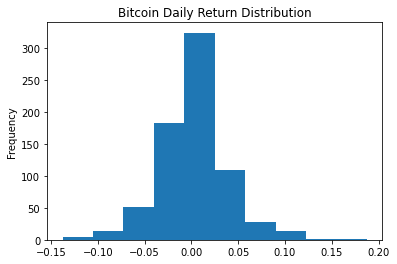

In [5]:
# Visualize distribution of bitcoin percent change in closing price using a histogram plot
daily_returns["btc"].plot.hist(title='Bitcoin Daily Return Distribution')


<AxesSubplot:title={'center':'Ethereum Daily Return Distribution'}, ylabel='Frequency'>

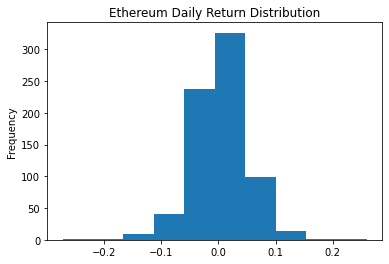

In [6]:
daily_returns["eth"].plot.hist(title='Ethereum Daily Return Distribution')

<AxesSubplot:title={'center':'Terra Daily Return Distribution'}, ylabel='Frequency'>

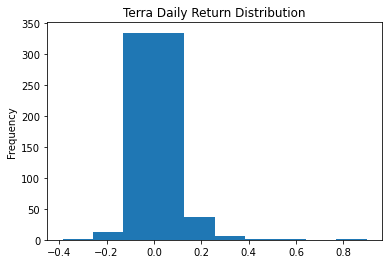

In [7]:
daily_returns["luna1"].plot.hist(title='Terra Daily Return Distribution')

<AxesSubplot:title={'center':'Binance Daily Return Distribution'}, ylabel='Frequency'>

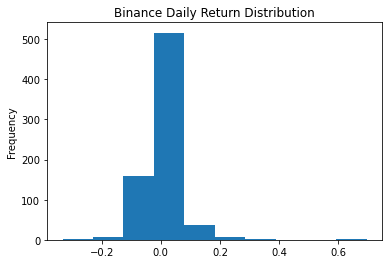

In [8]:
daily_returns["bnb"].plot.hist(title='Binance Daily Return Distribution')

<AxesSubplot:title={'center':'Cardano Daily Return Distribution'}, ylabel='Frequency'>

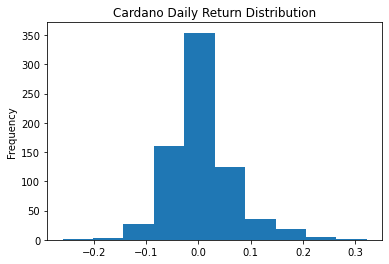

In [9]:
daily_returns["ada"].plot.hist(title='Cardano Daily Return Distribution')